In [ ]:
import pandas as pd

# Load the dataset from the provided URL
url = "https://raw.githubusercontent.com/datasets/covid-19/main/data/countries-aggregated.csv"
df = pd.read_csv(url)

# Display the first few rows of the dataset
print(df.head())

# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

# Convert the date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Verify the conversion
print(df.info())


         Date      Country  Confirmed  Recovered  Deaths
0  2020-01-22  Afghanistan          0          0       0
1  2020-01-23  Afghanistan          0          0       0
2  2020-01-24  Afghanistan          0          0       0
3  2020-01-25  Afghanistan          0          0       0
4  2020-01-26  Afghanistan          0          0       0
Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161568 entries, 0 to 161567
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Date       161568 non-null  datetime64[ns]
 1   Country    161568 non-null  object        
 2   Confirmed  161568 non-null  int64         
 3   Recovered  161568 non-null  int64         
 4   Deaths     161568 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 6.2+ MB
None


In [ ]:
# Display basic information about the dataset
print(df.info())
print(df.describe())
print(df.head())

# Identify outliers by looking at the statistics
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161568 entries, 0 to 161567
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Date       161568 non-null  datetime64[ns]
 1   Country    161568 non-null  object        
 2   Confirmed  161568 non-null  int64         
 3   Recovered  161568 non-null  int64         
 4   Deaths     161568 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 6.2+ MB
None
                                Date     Confirmed     Recovered  \
count                         161568  1.615680e+05  1.615680e+05   
mean   2021-03-04 11:59:59.999999232  7.361569e+05  1.453967e+05   
min              2020-01-22 00:00:00  0.000000e+00  0.000000e+00   
25%              2020-08-12 18:00:00  1.220000e+03  0.000000e+00   
50%              2021-03-04 12:00:00  2.369200e+04  1.260000e+02   
75%              2021-09-24 06:00:00  2.558420e+05  1.797225e+04   
max 

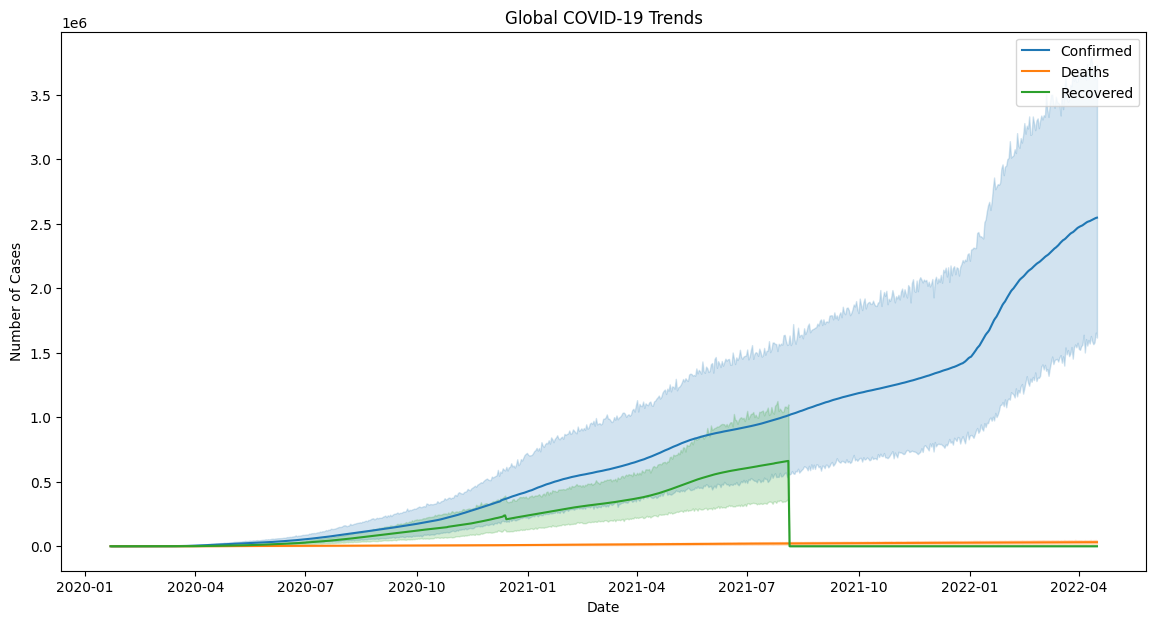

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot total number of confirmed cases, deaths, and recoveries over time
plt.figure(figsize=(14, 7))
sns.lineplot(x='Date', y='Confirmed', data=df, label='Confirmed')
sns.lineplot(x='Date', y='Deaths', data=df, label='Deaths')
sns.lineplot(x='Date', y='Recovered', data=df, label='Recovered')
plt.title('Global COVID-19 Trends')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.show()


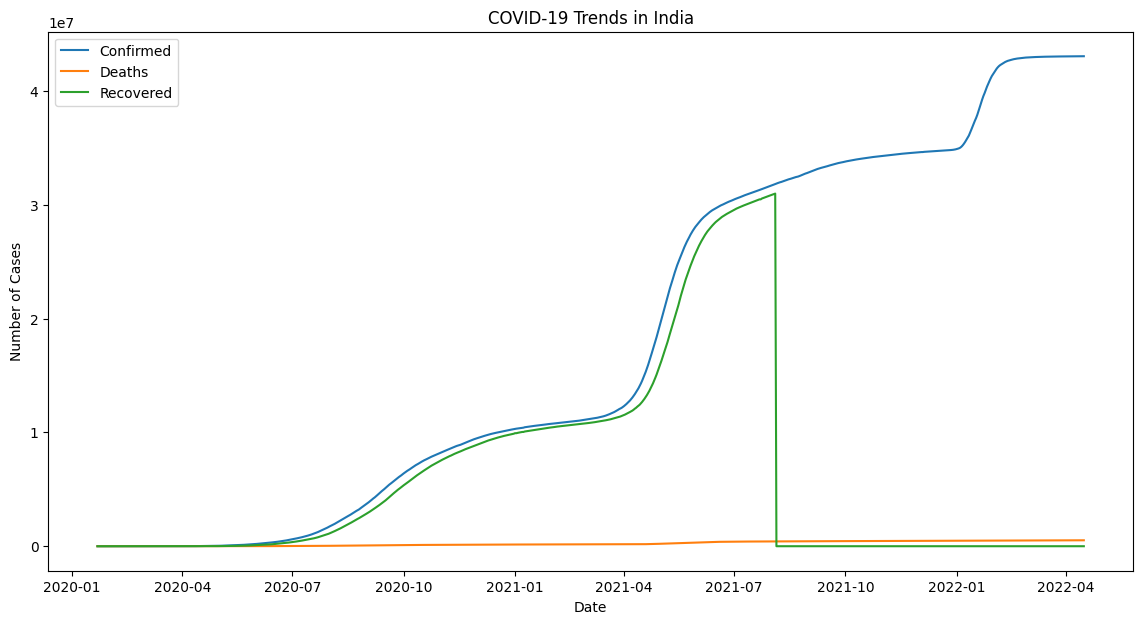

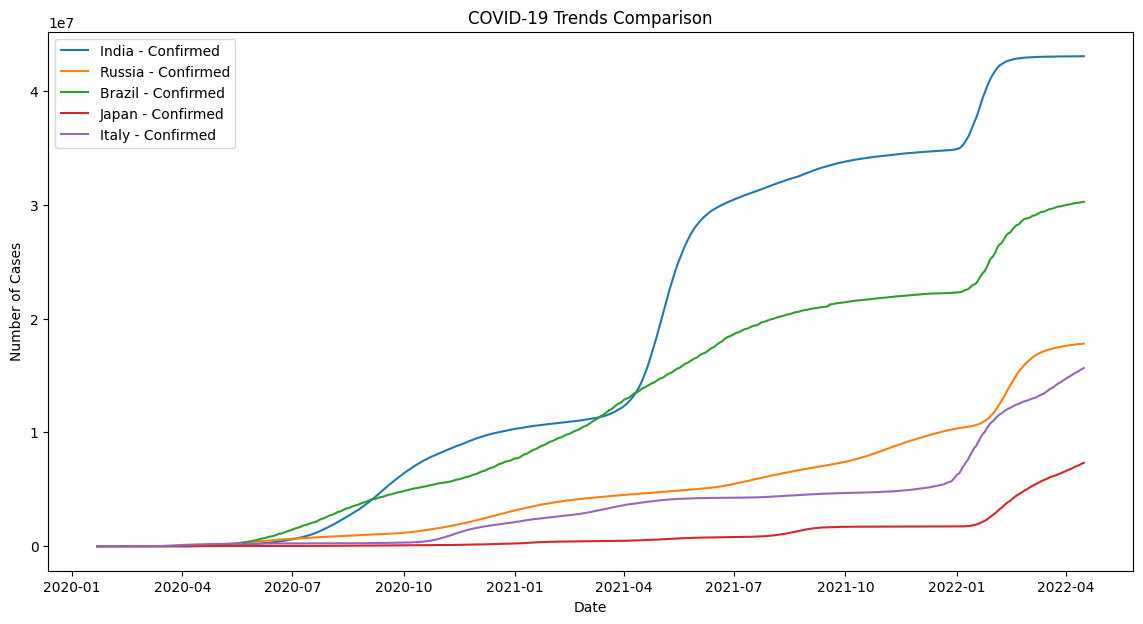

In [ ]:
def plot_country_trends(country):
    country_data = df[df['Country'] == country]
    plt.figure(figsize=(14, 7))
    sns.lineplot(x='Date', y='Confirmed', data=country_data, label='Confirmed')
    sns.lineplot(x='Date', y='Deaths', data=country_data, label='Deaths')
    sns.lineplot(x='Date', y='Recovered', data=country_data, label='Recovered')
    plt.title(f'COVID-19 Trends in {country}')
    plt.xlabel('Date')
    plt.ylabel('Number of Cases')
    plt.legend()
    plt.show()

# Example: Plot trends for a specific country
plot_country_trends('India')

# Compare trends of multiple countries
def compare_countries(countries):
    plt.figure(figsize=(14, 7))
    for country in countries:
        country_data = df[df['Country'] == country]
        sns.lineplot(x='Date', y='Confirmed', data=country_data, label=f'{country} - Confirmed')
    plt.title('COVID-19 Trends Comparison')
    plt.xlabel('Date')
    plt.ylabel('Number of Cases')
    plt.legend()
    plt.show()

# Example: Compare trends for multiple countries
compare_countries(['India', 'Russia', 'Brazil', 'Japan', 'Italy'])


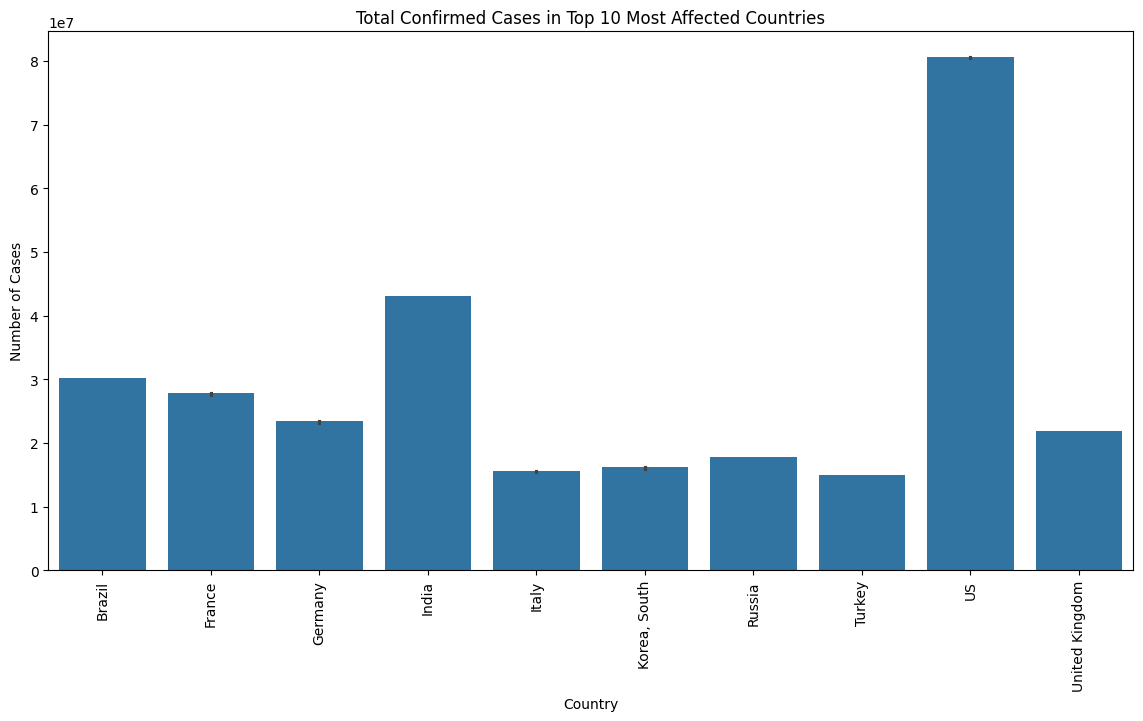

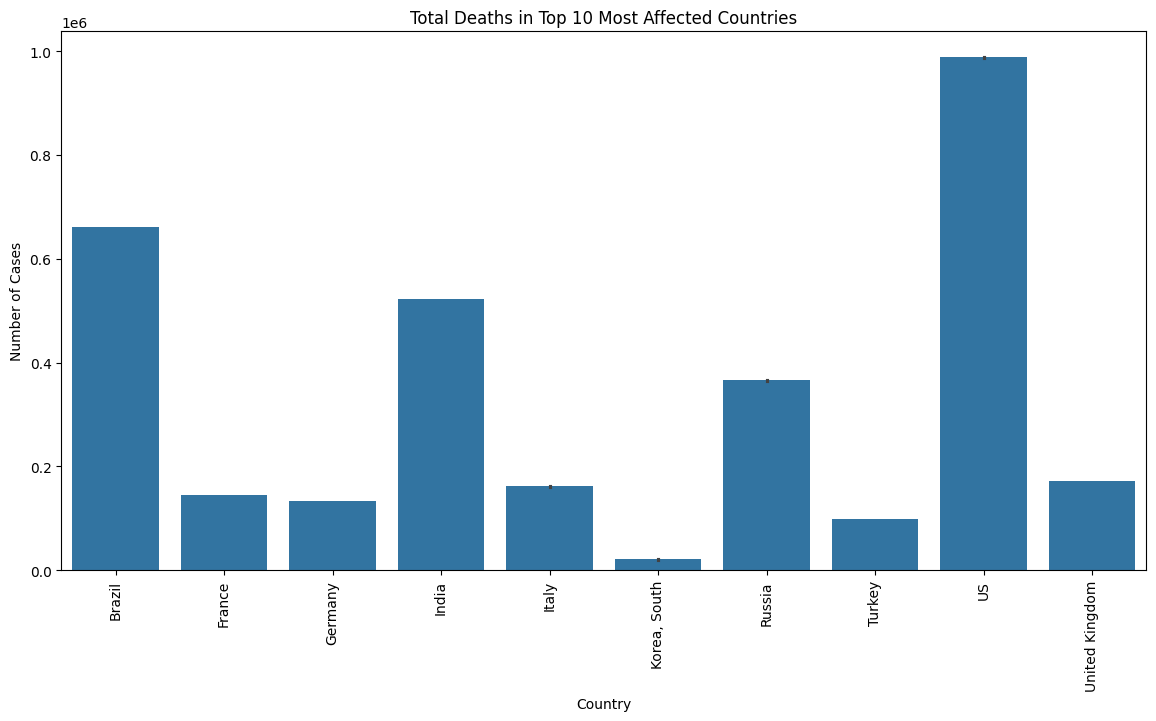

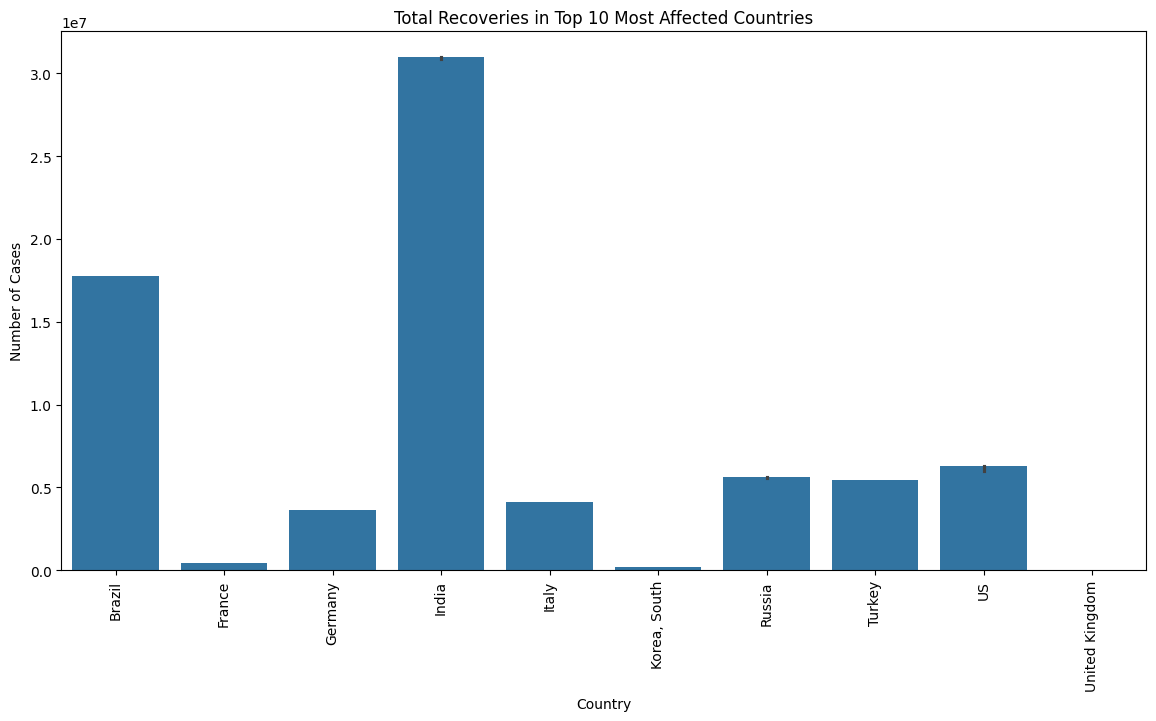

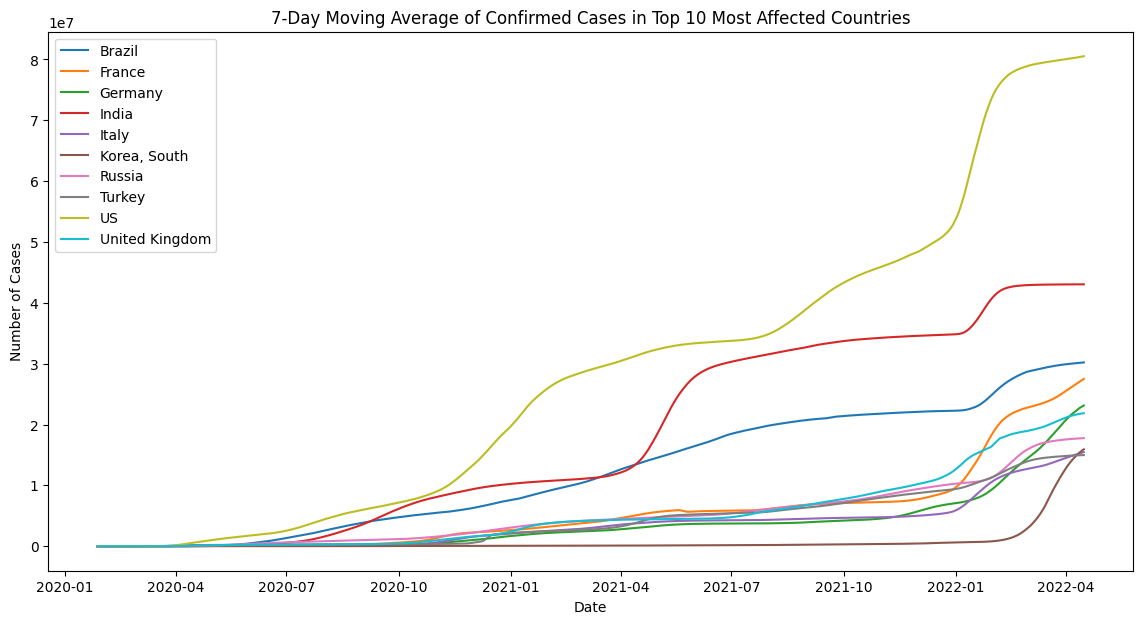

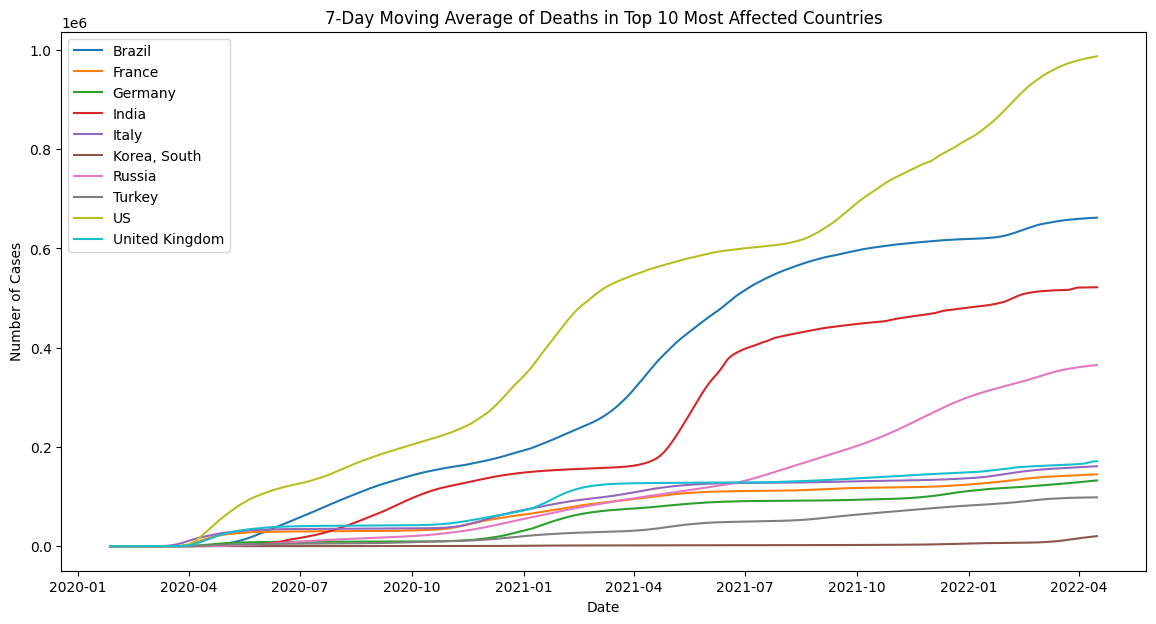

In [ ]:
# Identify the top 10 most affected countries
top_countries = df.groupby('Country')['Confirmed'].max().sort_values(ascending=False).head(10).index
top_countries_data = df[df['Country'].isin(top_countries)]

# Create bar plots to compare the total number of confirmed cases, deaths, and recoveries
plt.figure(figsize=(14, 7))
sns.barplot(x='Country', y='Confirmed', data=top_countries_data, estimator=max)
plt.title('Total Confirmed Cases in Top 10 Most Affected Countries')
plt.xlabel('Country')
plt.ylabel('Number of Cases')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(14, 7))
sns.barplot(x='Country', y='Deaths', data=top_countries_data, estimator=max)
plt.title('Total Deaths in Top 10 Most Affected Countries')
plt.xlabel('Country')
plt.ylabel('Number of Cases')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(14, 7))
sns.barplot(x='Country', y='Recovered', data=top_countries_data, estimator=max)
plt.title('Total Recoveries in Top 10 Most Affected Countries')
plt.xlabel('Country')
plt.ylabel('Number of Cases')
plt.xticks(rotation=90)
plt.show()

# Analyse the growth rate of cases and deaths using moving averages
top_countries_growth = df[df['Country'].isin(top_countries)].copy()
top_countries_growth['Confirmed_MA'] = top_countries_growth.groupby('Country')['Confirmed'].transform(lambda x: x.rolling(window=7).mean())
top_countries_growth['Deaths_MA'] = top_countries_growth.groupby('Country')['Deaths'].transform(lambda x: x.rolling(window=7).mean())

plt.figure(figsize=(14, 7))
sns.lineplot(x='Date', y='Confirmed_MA', hue='Country', data=top_countries_growth)
plt.title('7-Day Moving Average of Confirmed Cases in Top 10 Most Affected Countries')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend(loc='upper left')
plt.show()

plt.figure(figsize=(14, 7))
sns.lineplot(x='Date', y='Deaths_MA', hue='Country', data=top_countries_growth)
plt.title('7-Day Moving Average of Deaths in Top 10 Most Affected Countries')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend(loc='upper left')
plt.show()


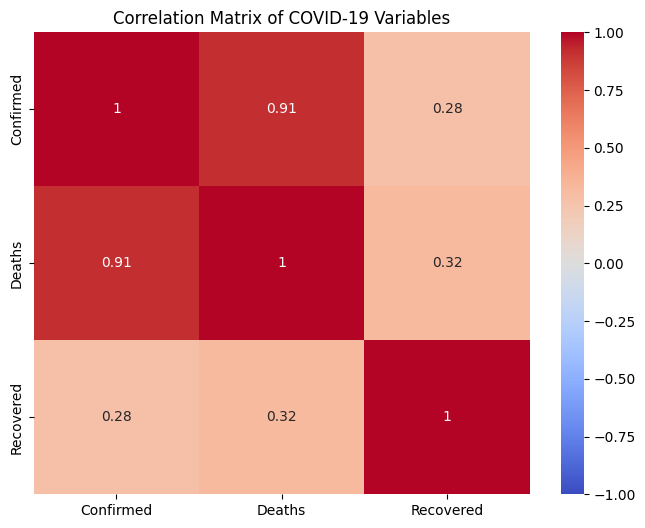

In [ ]:
# Correlation between different variables
correlation_matrix = df[['Confirmed', 'Deaths', 'Recovered']].corr()

# Use heatmaps to visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of COVID-19 Variables')
plt.show()
